In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("employee_data.csv")
df

,EmployeeID,Name,Department,Salary,JoiningDate,Status
0,7970,NaN,Operations,44168.0,2023-04-16,Terminated
1,1752,Shannon Franco,HR,80140.0,2016-08-22,Terminated
2,8478,NaN,HR,144316.0,2023-11-04,Terminated
3,5157,Barbara Alvarez,Operations,35075.0,2023-04-22,NaN
4,1816,Adam Cobb,Sales,142537.0,2016-05-12,Active
...,...,...,...,...,...,...
495,2862,NaN,Operations,83271.0,2019-03-19,Active
496,3910,Douglas English,Engineering,94038.0,2022-09-23,Resigned
497,1009,NaN,Sales,102768.0,2023-03-24,Active
498,3062,Christopher Perry,NaN,129374.0,2023-12-01,Terminated


In [3]:
df.head()

,EmployeeID,Name,Department,Salary,JoiningDate,Status
0,7970,NaN,Operations,44168.0,2023-04-16,Terminated
1,1752,Shannon Franco,HR,80140.0,2016-08-22,Terminated
2,8478,NaN,HR,144316.0,2023-11-04,Terminated
3,5157,Barbara Alvarez,Operations,35075.0,2023-04-22,NaN
4,1816,Adam Cobb,Sales,142537.0,2016-05-12,Active


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   500 non-null    int64  
 1   Name         450 non-null    object 
 2   Department   450 non-null    object 
 3   Salary       450 non-null    float64
 4   JoiningDate  450 non-null    object 
 5   Status       450 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB


In [5]:
df.describe()

,EmployeeID,Salary
count,500.000000,450.000000
mean,5581.934000,92814.086667
std,2550.098541,33862.208469
min,1009.000000,30053.000000
25%,3494.750000,64003.750000
50%,5604.000000,91832.500000
75%,7760.750000,122419.500000
max,9970.000000,149016.000000


In [6]:
# 1. Data Cleaning: Write Python code to:

In [7]:
# Remove any duplicate entries. 
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
# Handle missing values (you can choose to fill them with a default value or drop the rows). 
# df.fillna(method="Name", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   500 non-null    int64  
 1   Name         450 non-null    object 
 2   Department   450 non-null    object 
 3   Salary       450 non-null    float64
 4   JoiningDate  450 non-null    object 
 5   Status       450 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB


In [9]:
# Convert the JoiningDate column to a proper datetime format.

df['JoiningDate'] = pd.to_datetime(df['JoiningDate'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   EmployeeID   500 non-null    int64         
 1   Name         450 non-null    object        
 2   Department   450 non-null    object        
 3   Salary       450 non-null    float64       
 4   JoiningDate  450 non-null    datetime64[ns]
 5   Status       450 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 23.6+ KB


In [10]:
# Filter out employees who are no longer working (where Status is 'Resigned'). 
df = df[df['Status'] != 'Resigned']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   EmployeeID   386 non-null    int64         
 1   Name         344 non-null    object        
 2   Department   351 non-null    object        
 3   Salary       348 non-null    float64       
 4   JoiningDate  348 non-null    datetime64[ns]
 5   Status       336 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 21.1+ KB


In [11]:
# 2. Analysis: After cleaning the data, perform the following: 

In [12]:
# ○ Find the average salary of employees in each department.
avg_salary_dept = df.groupby('Department')['Salary'].mean()
print("Average Salary by Department:")
print(avg_salary_dept)

Average Salary by Department:
Department
Engineering    96489.841270
Finance        93750.352941
HR             84993.927273
Marketing      87177.307692
Operations     96972.142857
Sales          95010.358491
Name: Salary, dtype: float64


In [13]:
# List all employees who joined after the year 2020. 
joined_after_2020 = df[df['JoiningDate'] > '2020-12-31']
print("Employees who joined after 2020:")
print(joined_after_2020[['EmployeeID', 'Name', 'JoiningDate']])


Employees who joined after 2020:
     EmployeeID               Name JoiningDate
0          7970                NaN  2023-04-16
2          8478                NaN  2023-11-04
3          5157    Barbara Alvarez  2023-04-22
6          6247      Allison Salas  2023-06-14
11         9068                NaN  2021-05-18
..          ...                ...         ...
488        3772     Jonathan Haley  2024-01-11
492        7210      Phillip Riley  2023-01-04
494        4951     Terry Harrison  2022-10-10
497        1009                NaN  2023-03-24
498        3062  Christopher Perry  2023-12-01

[131 rows x 3 columns]


In [14]:
# 3. Expected Output: Submit a cleaned DataFrame and the results of your analysis.
print("Cleaned DataFrame:")
print(df)


Cleaned DataFrame:
     EmployeeID               Name  Department    Salary JoiningDate  \
0          7970                NaN  Operations   44168.0  2023-04-16   
1          1752     Shannon Franco          HR   80140.0  2016-08-22   
2          8478                NaN          HR  144316.0  2023-11-04   
3          5157    Barbara Alvarez  Operations   35075.0  2023-04-22   
4          1816          Adam Cobb       Sales  142537.0  2016-05-12   
..          ...                ...         ...       ...         ...   
494        4951     Terry Harrison         NaN  124381.0  2022-10-10   
495        2862                NaN  Operations   83271.0  2019-03-19   
497        1009                NaN       Sales  102768.0  2023-03-24   
498        3062  Christopher Perry         NaN  129374.0  2023-12-01   
499        3252     Amanda Goodwin  Operations   61499.0  2020-07-18   

         Status  
0    Terminated  
1    Terminated  
2    Terminated  
3           NaN  
4        Active  
..      

In [15]:
# Task 2: Data Visualization

In [16]:
# 1. Load the dataset into a Pandas DataFrame. 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
df=pd.read_csv("employee_data.csv")
df.head()


,EmployeeID,Name,Department,Salary,JoiningDate,Status
0,7970,NaN,Operations,44168.0,2023-04-16,Terminated
1,1752,Shannon Franco,HR,80140.0,2016-08-22,Terminated
2,8478,NaN,HR,144316.0,2023-11-04,Terminated
3,5157,Barbara Alvarez,Operations,35075.0,2023-04-22,NaN
4,1816,Adam Cobb,Sales,142537.0,2016-05-12,Active


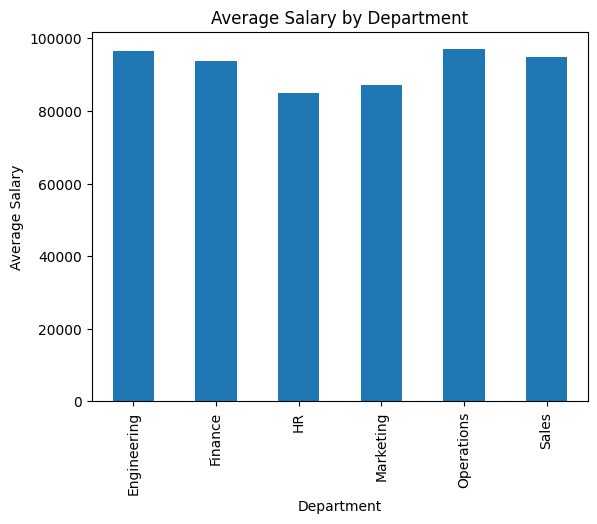

In [17]:
# 2. Create at least four meaningful visualizations using Matplotlib or seaborn to understand the data better. 
# Example Visualization 1: Bar chart of average salary by departmeent
avg_salary_dept.plot(kind='bar', title='Average Salary by Department')
plt.xlabel(xlabel='Department')
plt.ylabel(ylabel='Average Salary')
plt.show()



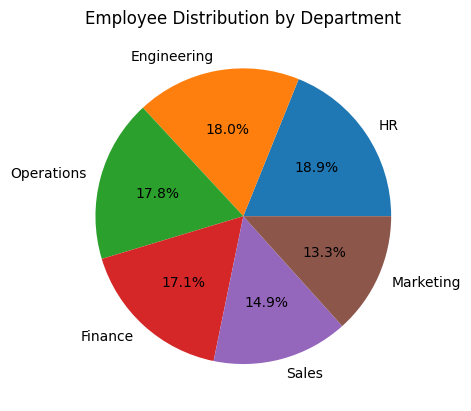

In [18]:
# Example Visualization 2: Pie chart of employee distribution by department
dept_counts = df['Department'].value_counts()   
dept_counts.plot(kind='pie', autopct='%1.1f%%', title='Employee Distribution by Department')
plt.ylabel('')  
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   500 non-null    int64  
 1   Name         450 non-null    object 
 2   Department   450 non-null    object 
 3   Salary       450 non-null    float64
 4   JoiningDate  450 non-null    object 
 5   Status       450 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB


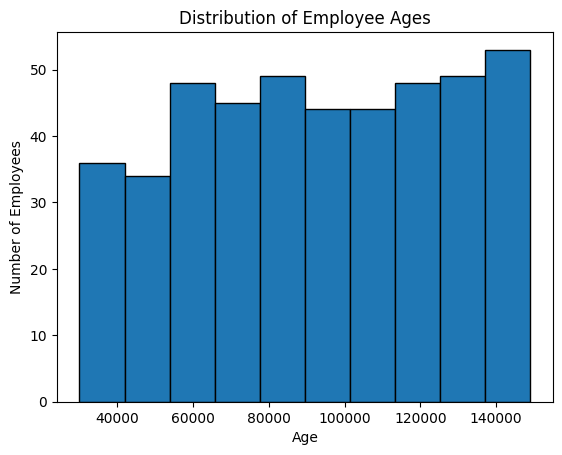

In [22]:
# Example Visualization 3: Histogram of employee ages
plt.hist(x=df['Salary'], bins=10, edgecolor='black')
plt.title(label='Distribution of Employee Ages')
plt.xlabel(xlabel='Age')   
plt.ylabel(ylabel='Number of Employees')
plt.show()

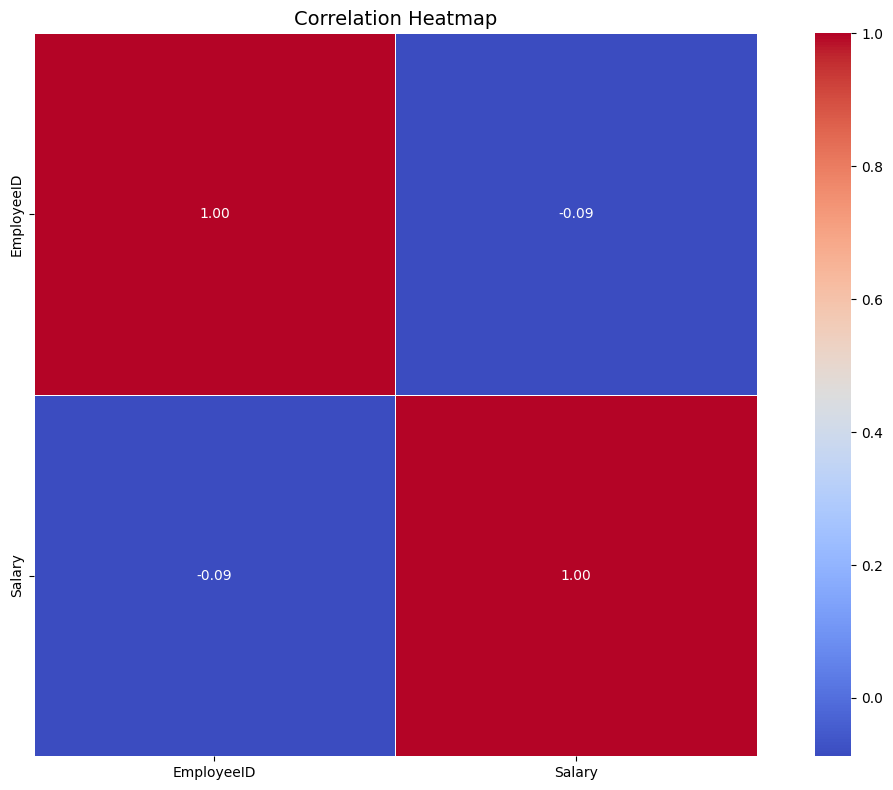

In [24]:
# . Include one correlation heatmap of all numerical variables in the dataset. 
# plt.figure(figsize=(10, 6))
# correlation_matrix = df.corr()
# sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title(label='Correlation Heatmap of Numerical Variables')
# plt.show()
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    linewidths=0.5,
    cmap='coolwarm',
    fmt=".2f",
    square=True
)

plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
# Expected Output: Submit the code, the dataset, and the visualizations. 